# Example 4.1: Pull-out with unloading

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from bmcs.api import PullOutModel

## Model parameters
Let us consider the case of the CFRP sheet debonding from concrete

In [2]:
A_f = 16.67 # [mm^2]
A_m = 1540.0 # [mm^2]
p = 1.0 #
E_f = 170000 # [MPa]
E_m = 28000 # [MPa]

## Construct the finite element pullout model
The model uses a multilinear bond-slip law specified by the attributes 
s_arr and tau_arr specifying the pairs of slip and bond stress values.

In [3]:
pm = PullOutModel(mats_eval_type='multilinear',
                  n_e_x=50, k_max=200, w_max=1.84)
pm.sim.tline.step = 0.001
pm.mats_eval.s_tau_table = [[0, 0.1, 0.4, 4],
                            [0, 800, 0, 0]]
#w = pm.get_window()
#w.configure_traits()
pm

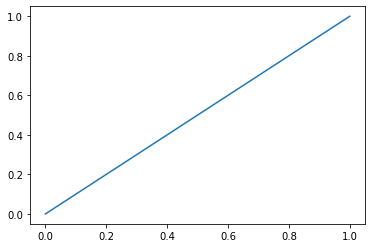

In [4]:
pm.loading_scenario.plot(plt.axes())
pm.loading_scenario

In [5]:
pm.loading_scenario.loading_type='cyclic'
pm.loading_scenario.trait_set(number_of_cycles=2,
                              unloading_ratio=0.0,
                              amplitude_type='constant',
                              loading_range='non-symmetric')
pm.loading_scenario

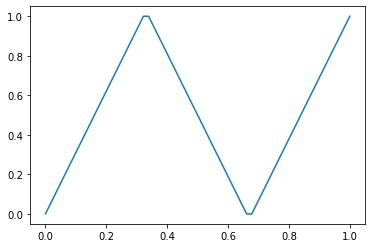

In [6]:
pm.loading_scenario.plot(plt.axes())

In [7]:
pm.cross_section.trait_set(A_f=A_f, P_b=p, A_m=A_m)
pm.cross_section # display the cross section parameters

In [8]:
pm.geometry # geometry of the boundary value problem

## Plot the current bond-slip law

In [9]:
pm.mats_eval # configuration of the material model

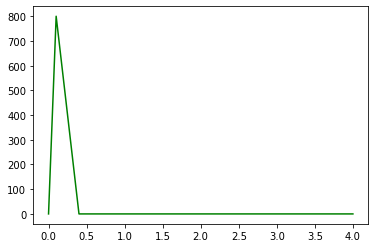

In [10]:
pm.mats_eval.bs_law.plot(plt, color='green')

In [11]:
c='red'
pm.geometry.L_x = 200
pm.sim.run()

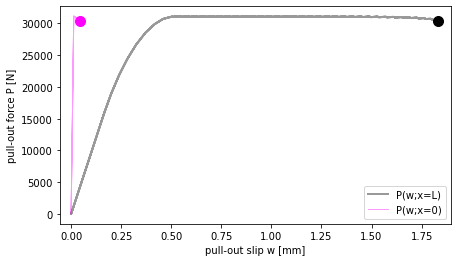

In [12]:
fig, ax = plt.subplots(1,1,figsize=(7,4))
pm.hist.plot_Pw(ax,1)

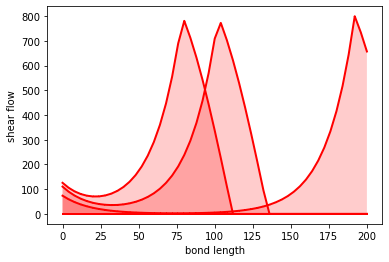

In [13]:
ax = plt.axes()
for t in np.linspace(0.,0.62,4):
    pm.plot_sf(ax,t)
plt.show()

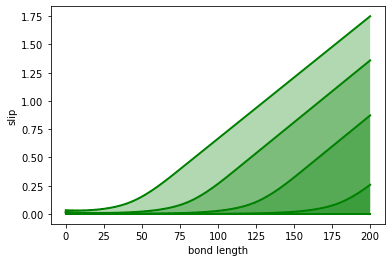

In [14]:
ax = plt.axes()
for t in np.linspace(0.,.99,5):
    pm.plot_s(ax,t)
plt.show()

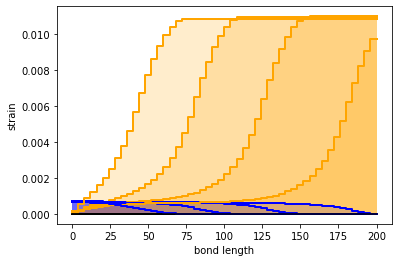

In [15]:
ax = plt.axes()
for t in np.linspace(0.,.99,5):
    pm.plot_eps_p(ax,t)
plt.show()

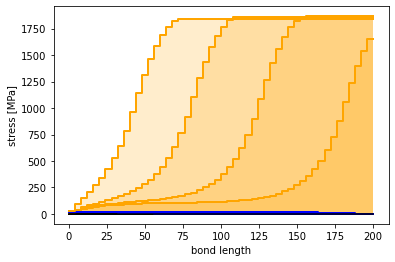

In [16]:
ax = plt.axes()
for t in np.linspace(0.,.99,5):
    pm.plot_sig_p(ax,t)
plt.show()

# Questions and Tasks

### 1 Define a symmetric loading scenario with increasing amplitude and 3 cycles